# News headline Analysis and Insight Report

### 1.1 Load and inspect the data

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import matplotlib.pyplot as plt

# --- Import functions from src ---
from src.descriptive_stats import (
    load_news_data, add_headline_length_features, compute_headline_stats
)
from src.publisher_analysis import (
    extract_publisher_domain, top_publishers, top_publisher_domains
)
from src.date_analysis import (
    parse_dates, daily_article_counts
)
from src.topic_modeling import (
    create_lda_pipeline, fit_lda_pipeline,
    extract_topics, get_feature_names, get_lda_model
)


# 1. Load data
news = load_news_data("../data/raw_analyst_ratings.csv")
print("Shape:", news.shape)
print(news.head())

Shape: (1407328, 6)
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-0

### 1.2 Descriptive statistics on text lengths
- Shape: (1407328, 6)

- This means your dataset contains 1,407,328 rows (articles) and 6 columns (Unnamed: 0, headline, url, publisher, date, stock).

In [2]:
# 2. Descriptive headline stats

news = add_headline_length_features(news)
print(compute_headline_stats(news))

       headline_len_chars  headline_len_words
count        1.407328e+06        1.407328e+06
mean         7.312051e+01        1.141671e+01
std          4.073531e+01        6.352997e+00
min          3.000000e+00        1.000000e+00
25%          4.700000e+01        7.000000e+00
50%          6.400000e+01        1.000000e+01
75%          8.700000e+01        1.300000e+01
max          5.120000e+02        7.700000e+01


#### Interpretation:

- Most headlines are between 47 to 87 characters, or 7 to 13 words.

- There’s a wide range, but the distribution looks normal with a bit of right skew (due to very long headlines).

#### Why this matters:
- This helps assess text complexity, design token limits for models, and understand how concise news headlines tend to be.

### 1.3. Count of articles per publisher

In [3]:

# 3. Publisher statistics
publisher_stats = top_publishers(news)
print(publisher_stats.head(10))

           publisher  n_articles
0      Paul Quintaro      228373
1         Lisa Levin      186979
2  Benzinga Newsdesk      150484
3      Charles Gross       96732
4      Monica Gerson       82380
5       Eddie Staley       57254
6         Hal Lindon       49047
7      ETF Professor       28489
8         Juan Lopez       28438
9     Benzinga Staff       28114


#### Insight:

- A few individual contributors dominate the feed.

- Indicates the dataset is heavily influenced by a small number of journalists or bots, affecting topic balance.

### 1.4. Time-based publication trends

<Axes: title={'center': 'Daily Article Count'}, xlabel='date'>

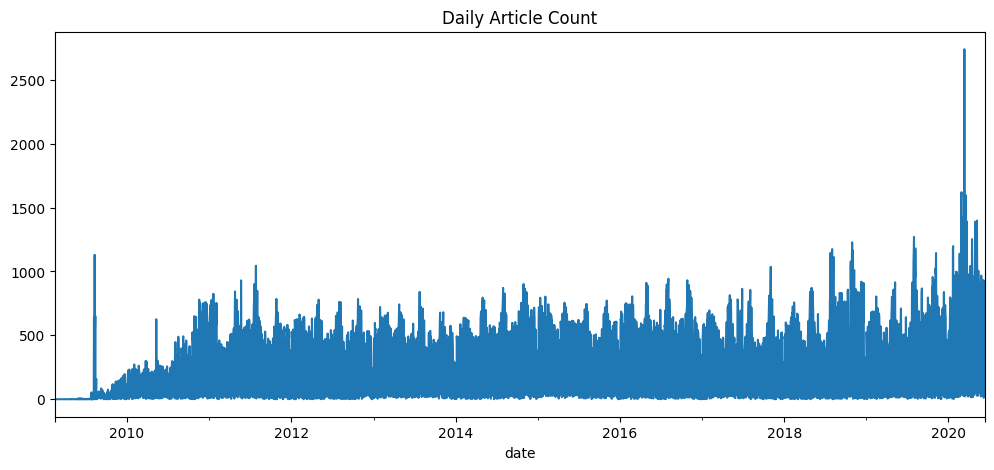

In [4]:

# 4. Time-based analysis
news = parse_dates(news)
daily_counts = daily_article_counts(news)
daily_counts.plot(title="Daily Article Count", figsize=(12, 5))

### Article Frequency Over Time
#### Interpretation:

- There is a clear upward trend from 2010 to 2020.

- Spikes suggest bursts of news activity—often around market events or earnings seasons.

- Notable massive spike in 2020, possibly related to COVID-19 and market turmoil.

#### Why this matters:

- Helps detect high-news-density periods, which correlate with market volatility.

- Traders can use this to identify event windows for strategy backtesting.

### 1.5. Publisher domain analysis

In [ ]:

# Extract and count publisher email domains
news = extract_publisher_domain(news)
domain_stats = top_publisher_domains(news)
print(domain_stats)

publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


: 

#### Interpretation:

- benzinga.com is clearly the main content source.

- Some email domains like gmail.com suggest occasional guest or external authors.

#### Why this matters:
- Knowing dominant publishers and sources helps you weigh their content when doing sentiment or event impact analysis.

### 1.6. Topic Modeling (lightweight keyword extraction)

In [ ]:

# 5. Topic modeling
lda_pipeline = create_lda_pipeline()
lda_pipeline = fit_lda_pipeline(lda_pipeline, news["headline"])
lda_model = get_lda_model(lda_pipeline)
feature_names = get_feature_names(lda_pipeline)


topics = extract_topics(lda_model, feature_names)
print("\nExtracted Topics:")
for i, terms in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(terms)}")

#### Interpretation:

- Topic 1: Analyst price targets (e.g. "buy", "raises", "price target")

- Topic 2: General financial news, company statements (e.g. "announces", "earnings", "upgrades")

- Topic 3: Earnings report vocabulary (e.g. "EPS", "Q4", "vs est")

- Topic 4: Market activity during the day (e.g. "mid", "update", "session")

- Topic 5: Weekly stock movements (e.g. "52-week", "movers", "ETFs")

#### Why this matters:

- Topics show common themes in financial news.

- Could be used for classifying news or building alert systems (e.g. notify on “earnings” or “price target” topics).

